# ANN From Scratch  with bias upgrades 

Ref

https://heartbeat.fritz.ai/building-a-neural-network-from-scratch-using-python-part-1-6d399df8d432

https://heartbeat.fritz.ai/building-a-neural-network-from-scratch-using-python-part-2-testing-the-network-c1f0c1c9cbb0


In [1]:
# data read 
import csv
import pandas as pd

# add header names
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

heart_df = pd.read_csv('heart.dat', sep=' ', names=headers)
# Check 
heart_df.head(n=10)

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
5,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1
6,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
7,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
8,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,2
9,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,2


In [2]:
# Check shape 
heart_df.shape

(270, 14)

In [3]:
#Check nulls
heart_df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [4]:
# Check data types 
heart_df.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object

In [5]:
# Split data and standardize 
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Create X data
#------------------
X = heart_df.drop(columns=['heart_disease'])

# Create y data 
#------------------
#1 means "have heart disease" and 0 means "do not have heart disease"
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1, 0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2, 1)

#----------------
y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)


#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)

#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

In [6]:
class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100):
        self.params = {} # Dict initialize for Weights and Biases 
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = [] # Array initialize for losses at each iteration 
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
        
    def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0,Z)
    
    def dRelu(self, x):
        '''
        Derivative of ReLu 
        '''
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))   

    def eta(self, x):
        ETA = 0.0000000001
        return np.maximum(x, ETA)

    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
    
    def mse_loss(self,y, y_hat):
        loss = 1 / 2 * np.mean((y - y_hat)**2)
        return loss

    
    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss
    
    
    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias accordingly.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat
        # Note yhat = sigmoid(z2) 
        # Note sigmoid_prime(x) = sigmoid(x)*(1 - sigmoid(x))

        # Define the Individual derivatives 
        dl_wrt_yhat  = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dyhat_wrt_z2 = yhat*(yhat_inv)
        dz2_wrt_A1   = self.params['W2']
        dA1_wrt_z1   = self.dRelu(self.params['Z1'])
        dz1_wrt_w1   = self.X
        dz2_wrt_w2  = self.params['A1']
        
        # Now from chain rule of calculus we have 
        #--------------------------------------------------
        ##  dl_wrt_w2 = dl_wrt_yhat*dyhat_wrt_z2*dz2_wrt_w2
        #--------------------------------------------------
        # Now following Matrix multiplication rules we have 
        # define delta2 
        delta2 = np.multiply(dl_wrt_yhat,dyhat_wrt_z2)
        # Compute derivatives with respect to outer Weight Matrix 
        dl_wrt_w2 = np.dot(dz2_wrt_w2.T,(delta2))
        
        # Again from chain rule we have 
        #--------------------------------------------------
        ## dl_wrt_w1 = dl_wrt_yhat*dyhat_wrt_z2*dz2_wrt_A1*dA1_wrt_z1*dz1_wrt_w1
        #--------------------------------------------------
        # Now following Matrix Multiplication rules we define
        
        delta1 = (np.dot(delta2,dz2_wrt_A1.T))*dA1_wrt_z1
        # Compute derivatives with respect to inner  Weight Matrix 
        dl_wrt_w1 = np.dot(dz1_wrt_w1.T,delta1)
        
        #--------------------------------------------------
        # Now compute derivates with respect to bias 
        #---------------------------------------------------
        
        
        # Outer Bias derivates : Following chain rule we have 
        #------------------------
        # dl_wrt_b2 = dl_wrt_yhat*dyhat_wrt_z2*dz2_wrt_b2
        #------------------------
        # Note:  dz2_wrt_b2 = [1]
        dl_wrt_b2 = np.sum(delta2, axis=0,keepdims=True)
        
        
        # Inner Bias derivatives : Following chain  rule we have 
        #------------------------
        # dl_wrt_b1 = dl_wrt_yhat*dyhat_wrt_z2*dz2_wrt_A1*dA1_wrt_z1*dz1_wrt_b1
        #------------------------
        # Note : dz1_wrt_b1 = 1 
        dl_wrt_b1 = np.sum(delta1,axis=0,keepdims = True)
        
        
        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
  
    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)
    
    
    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc
    
    
    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  

### Calling the NN model 

In [8]:
nn = NeuralNet() # create the NN model
nn.fit(Xtrain, ytrain) #train the model

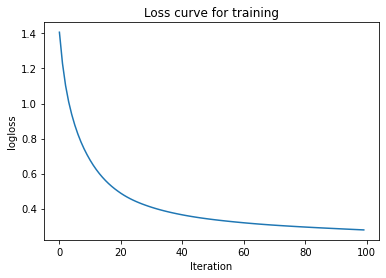

In [9]:
nn.plot_loss()

In [10]:
### Getting Accuracies
train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

Train accuracy is 87
Test accuracy is 75
